In [1]:
import wget

In [2]:
wget.download("https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/nlp_class/all_book_titles.txt")

100% [............................................................................] 127992 / 127992

'all_book_titles.txt'

In [3]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dellb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dellb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dellb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
wordnet_lemmatizer=WordNetLemmatizer()

In [6]:
titles=[line.rstrip() for line in open('datasets/all_book_titles.txt')]

In [7]:
stops=set(stopwords.words('english'))

In [8]:
stops=stops.union({'introduction','edition','series','application','approach','card','access','package','plus',
                  'etext','brief','vol','fundamental','guide','essential','printed','third','second','fourth','volume'})

In [9]:
def my_tokenizer(s):
    #loweercase
    s= s.lower()
    
    #split strings into tokens
    tokens=nltk.tokenize.word_tokenize(s)
    
    #remove short words
    tokens=[t for t in tokens if len(t)>2]
    
    #put words into base form
    tokens=[wordnet_lemmatizer.lemmatize(t) for t in tokens]
    
    #removing stopwrds
    tokens=[t for t in tokens if t not in stops]
    
    #remove any digits like 3rd edtion
    tokens=[t for t in tokens if not any(c.isdigit() for c in t)]
    
    return tokens

In [10]:
vectorizer=CountVectorizer(binary=True, tokenizer=my_tokenizer)

In [11]:
X=vectorizer.fit_transform(titles)

In [12]:
#index to word mapping
index_word_map=vectorizer.get_feature_names_out()

In [13]:
#transpose X to make rows=terms and cols=documents
X=X.T

In [14]:
svd=TruncatedSVD()
Z=svd.fit_transform(X)

In [15]:
!pip install plotly

In [16]:
import plotly.express as px

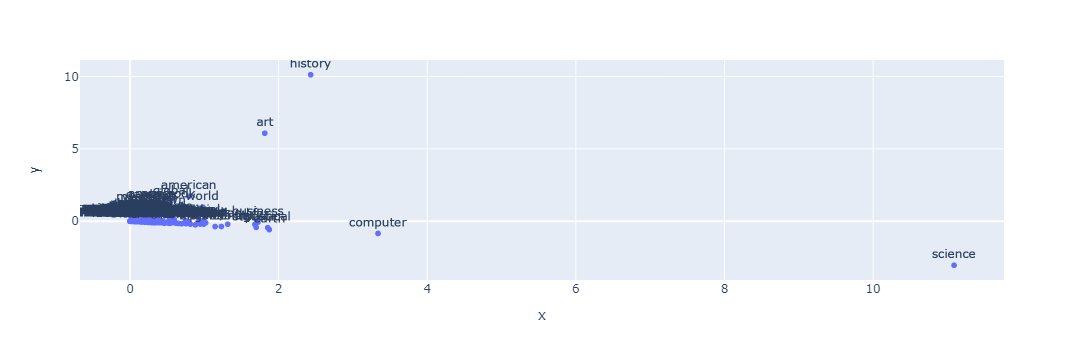

In [18]:
fig=px.scatter(x=Z[:,0], y=Z[:,1], text=index_word_map,size_max=60)
fig.update_traces(textposition='top center')
fig.show()